In [147]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


![Task1](../Images/1.png)

In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
def distribution(n: int) -> np.ndarray:
    x = np.zeros(n + 1, dtype=int)
    x[0] = np.random.randint(1, n)
    # x[0] = 2

    for iter in range(1, n + 1):
        if x[iter-1] == 0:
            prob = (1/2)**(5/2)
            if np.random.rand() < prob:
                x[iter] = 1
        else:
            u = np.random.rand()
            if u < 1/2:
                x[iter] = x[iter-1] - 1
            else:
                p = (x[iter-1]/(x[iter-1] + 1)) ** (3/2)

                v = np.random.rand()
                if v < p:
                    x[iter] = x[iter-1] + 1
                else:
                    x[iter] = x[iter-1]
    return x
n = int(1e6)
x = distribution(n)

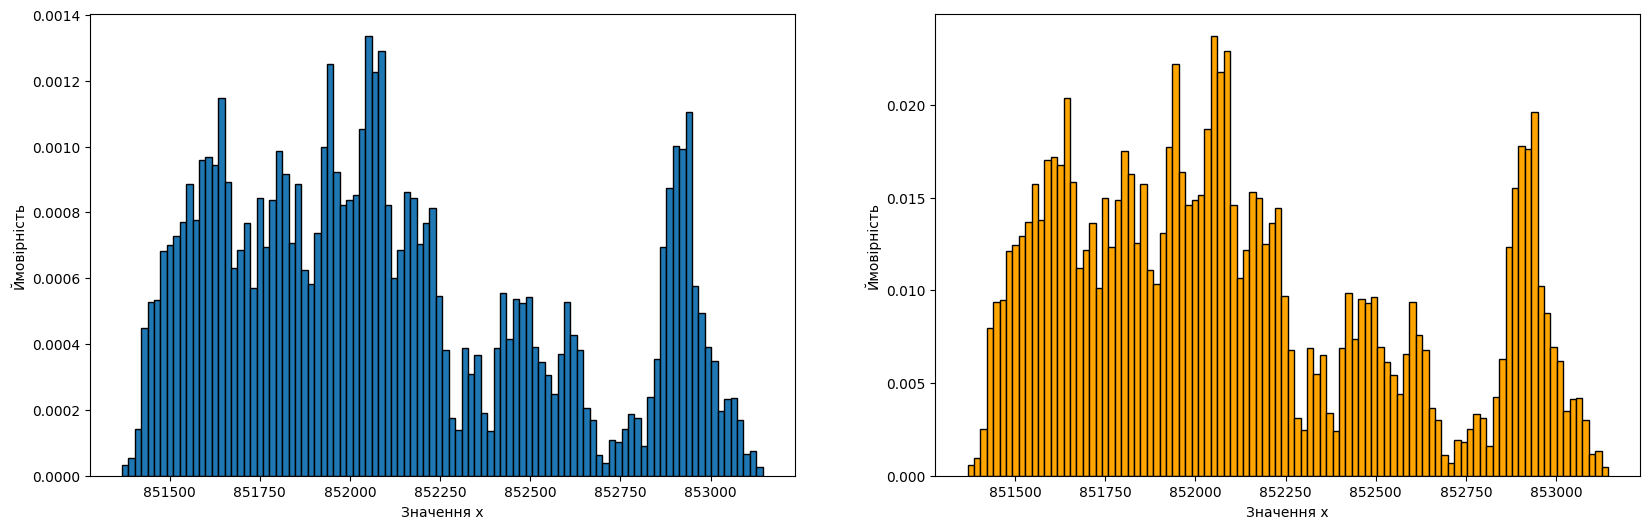

In [150]:
bins = 100
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].hist(x, bins=bins, density=True, stacked=True, edgecolor='black')

counts, bins = np.histogram(x, bins=bins)
probs = counts / counts.sum()
axes[1].bar(bins[:-1], probs, width=np.diff(bins), align='edge', color='orange', edgecolor='black')

axes[0].set_ylabel("Ймовірність")
axes[0].set_xlabel("Значення x")

axes[1].set_ylabel("Ймовірність")
axes[1].set_xlabel("Значення x")

plt.show()

In [151]:
# import pandas as pd
# from collections import Counter
# import math
# np.random.seed(0)

# # --- Task 1: Metropolis-Hastings for discrete distribution f(i) ∝ i^(3/2), i>=1 ---
# def sample_discrete_mh(target_exp=1.5, max_i=1000, burn=10_000, samples=1_000_000):
#     def f(i): return i**target_exp
#     x = 1
#     chain = []
#     for t in range(burn + samples):
#         # proposal: move by -1 or +1 with equal prob (reflect at 1)
#         move = np.random.choice([-1,1])
#         prop = x + move
#         if prop < 1: prop = 2 - prop  # reflect (keeps positive)
#         if prop > max_i: prop = max_i  # truncate high
#         alpha = min(1, f(prop)/f(x))
#         if np.random.rand() < alpha:
#             x = prop
#         if t >= burn:
#             chain.append(x)
#     return np.array(chain)

# chain1 = sample_discrete_mh()
# counts = Counter(chain1)
# # empirical pmf up to 50
# xs = np.arange(1,51)
# emp_pmf = np.array([counts[i] for i in xs]) / len(chain1)
# theo_unnorm = xs**1.5
# theo_pmf = theo_unnorm / theo_unnorm.sum()

# # Plot comparison
# plt.figure(figsize=(8,4))
# plt.bar(xs-0.2, emp_pmf, width=0.4, label='Empirical (MH)')
# # plt.bar(xs+0.2, theo_pmf, width=0.4, label='Theoretical (truncated 1..50)')
# plt.xlabel('i')
# plt.ylabel('Probability')
# plt.title('Task 1: MH sampling discrete f(i) ∝ i^{3/2} (burn-in 10^4)')
# plt.legend()
# plt.show()